#  1. KNN classifier

1. Implement a KNN classifier on the diabetes.csv file provided in the files download section. The KNN model should classify the data points on their Outcome based on the rest of the values. The dataset contains the following features:

Pregnancies: the number of times the patient was pregnant

Glucose: the plasma glucose concentration of the patient [glucose tolerance test]

BloodPressure: the patient's diastolic blood pressure (mm Hg)

SkinThickness: the patient's triceps skin fold thickness (mm)

Insulin: the patient's insulin levels after 2-hour test (muU/ml)

BMI: the patients body mass index [weight to height ration] (kg/m^2)

DiabetesPedigreeFunction: a function score of the patient's likelihood of diabetes based on family history

Age: the patients age in years

Outcome: the class variable of diabetic/non-diabetic (1/0)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
#Data Exploration
diabetes= pd.read_csv("diabetes-200828-121115.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Basic EDA and statistical analysis

Gives information about the data types,columns, null value counts, memory usage etc

In [4]:
diabetes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


A far more useful method for assessing missing data in this data set is by creating a quick visualization. To do this, we can use the seaborn visualization library. Here is quick command that you can use to create a heatmap using the seaborn library:

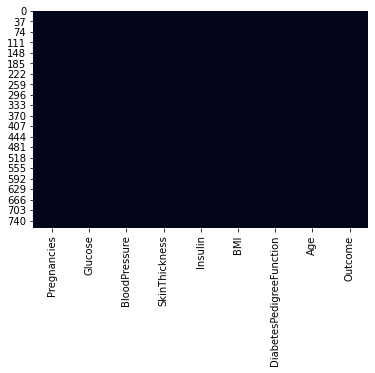

In [83]:
sns.heatmap(diabetes.isnull(), cbar=False)

In this visualization, there is no white lines which indicate no missing values in the dataset. But some values are 0

In [5]:
# basic statistic details about the data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Can minimum value of above listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [90]:
diabetes_data_copy = diabetes.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


To fill these Nan values the data distribution needs to be understood

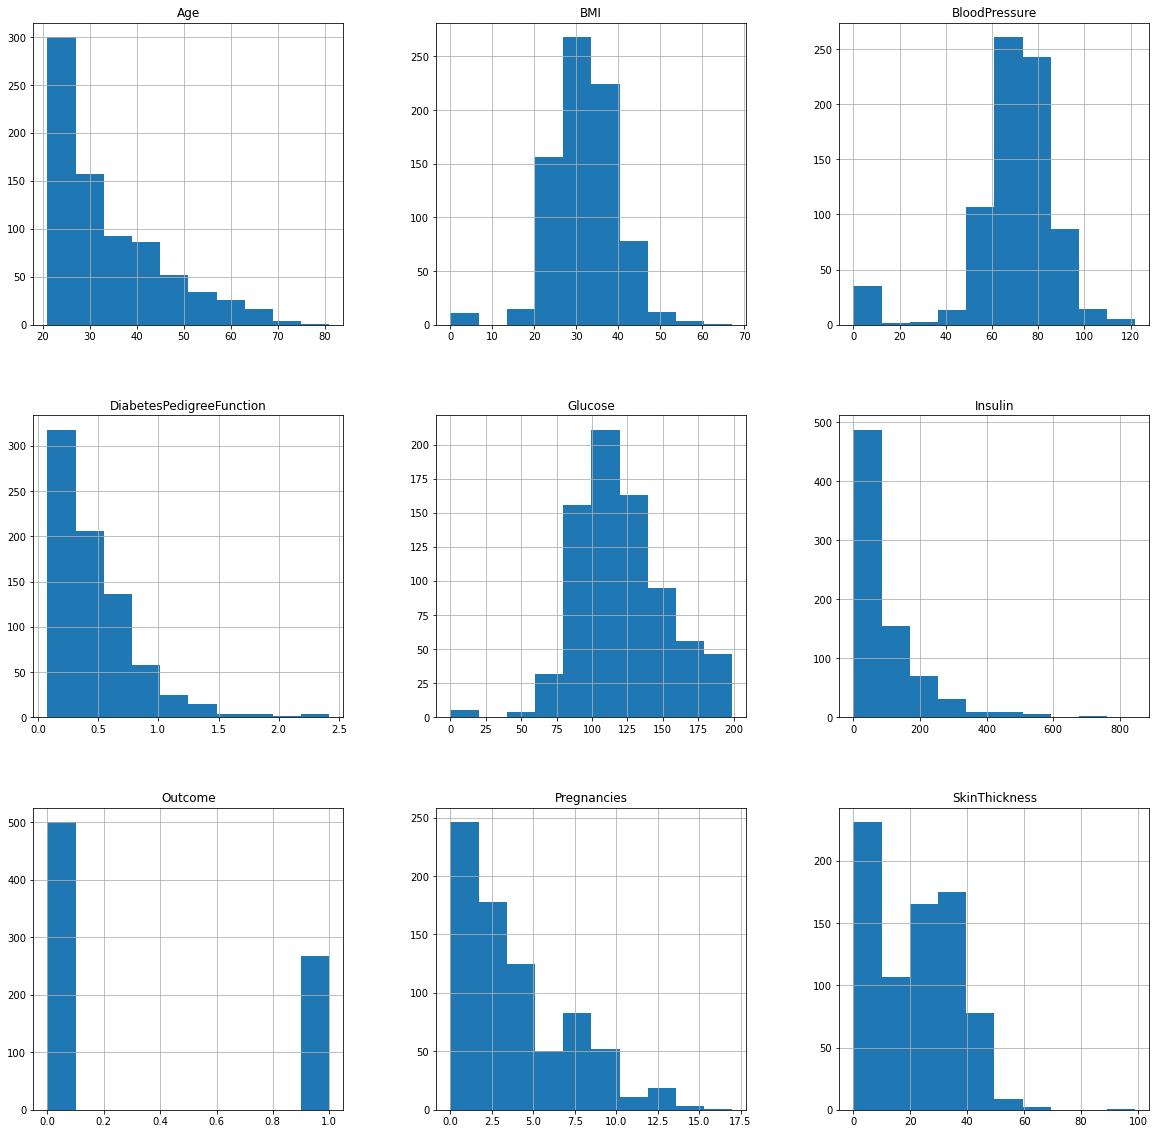

In [93]:
p = diabetes.hist(figsize = (20,20))

Aiming to impute nan values for the columns in accordance with their distribution

In [94]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

Plotting after Nan removal

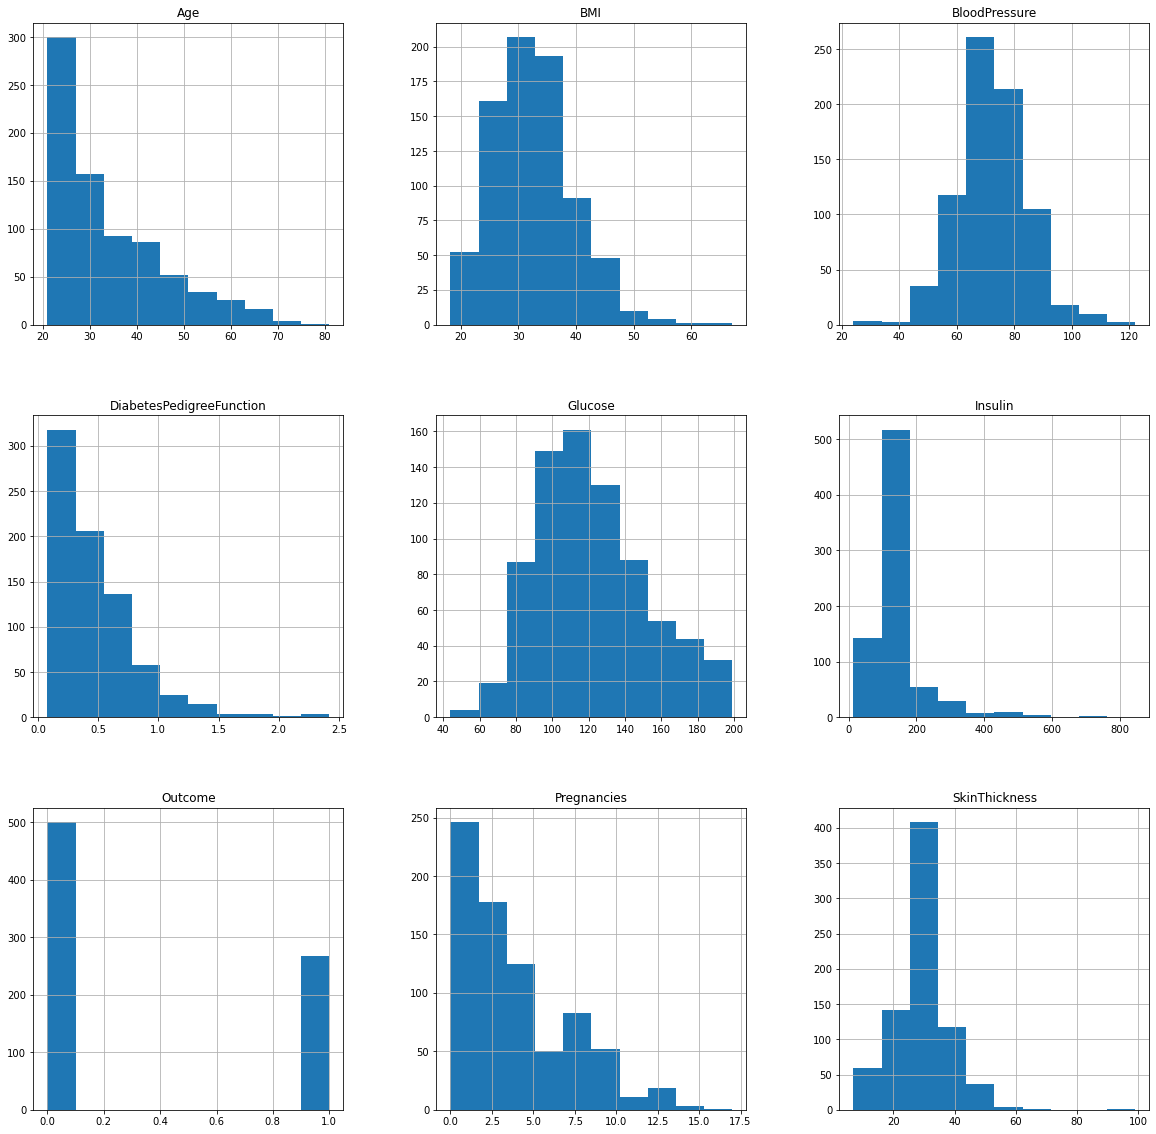

In [96]:
p = diabetes_data_copy.hist(figsize = (20,20))

Pairplot for uncleaned data

<Figure size 1800x1800 with 0 Axes>

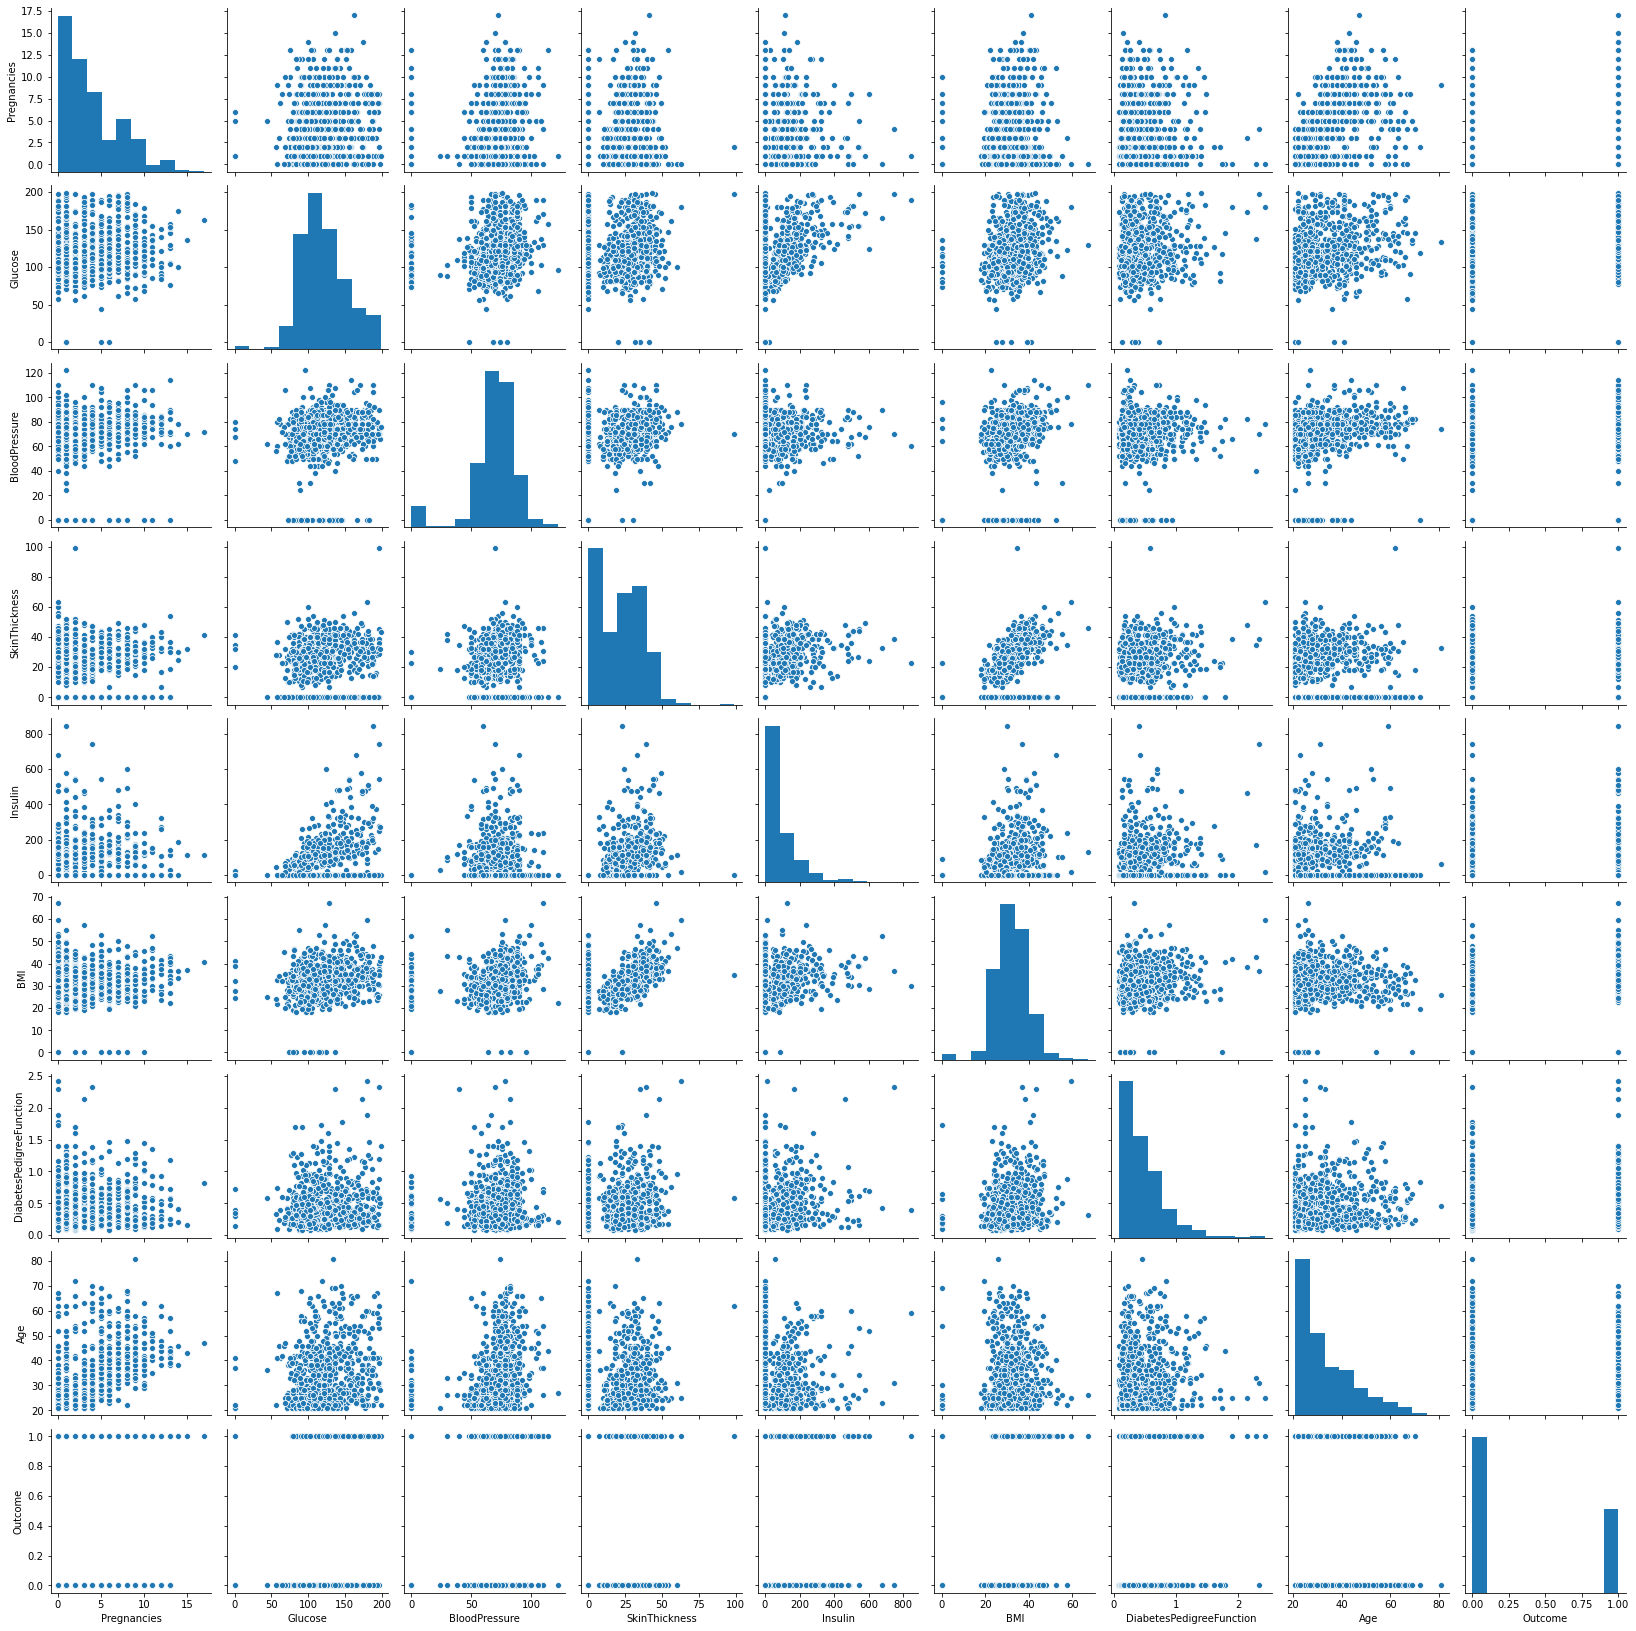

In [7]:
plt.figure(figsize=(25,25))
sns.pairplot(diabetes)


<Figure size 1800x1800 with 0 Axes>

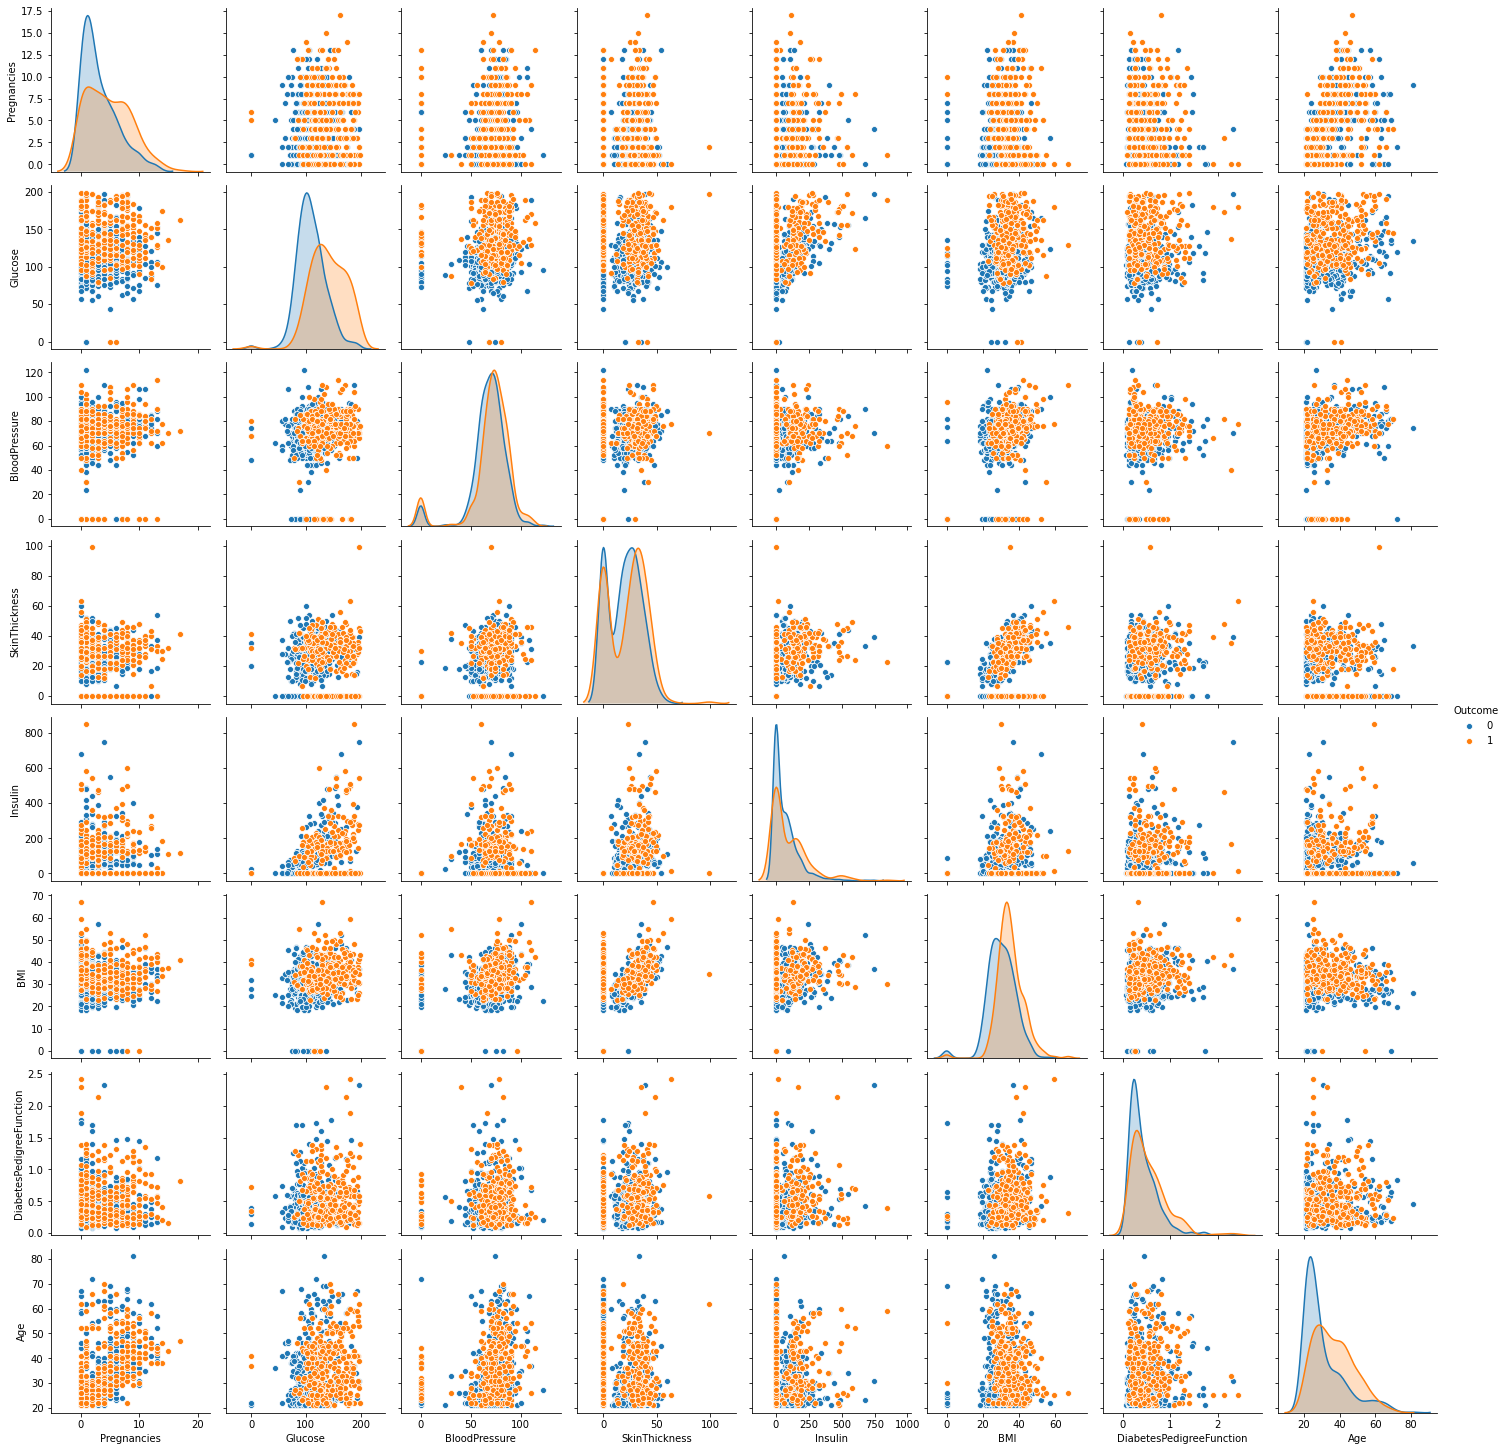

In [8]:
plt.figure(figsize=(25,25))
sns.pairplot(diabetes, hue = 'Outcome')

Pair plot for clean data

<Figure size 1800x1800 with 0 Axes>

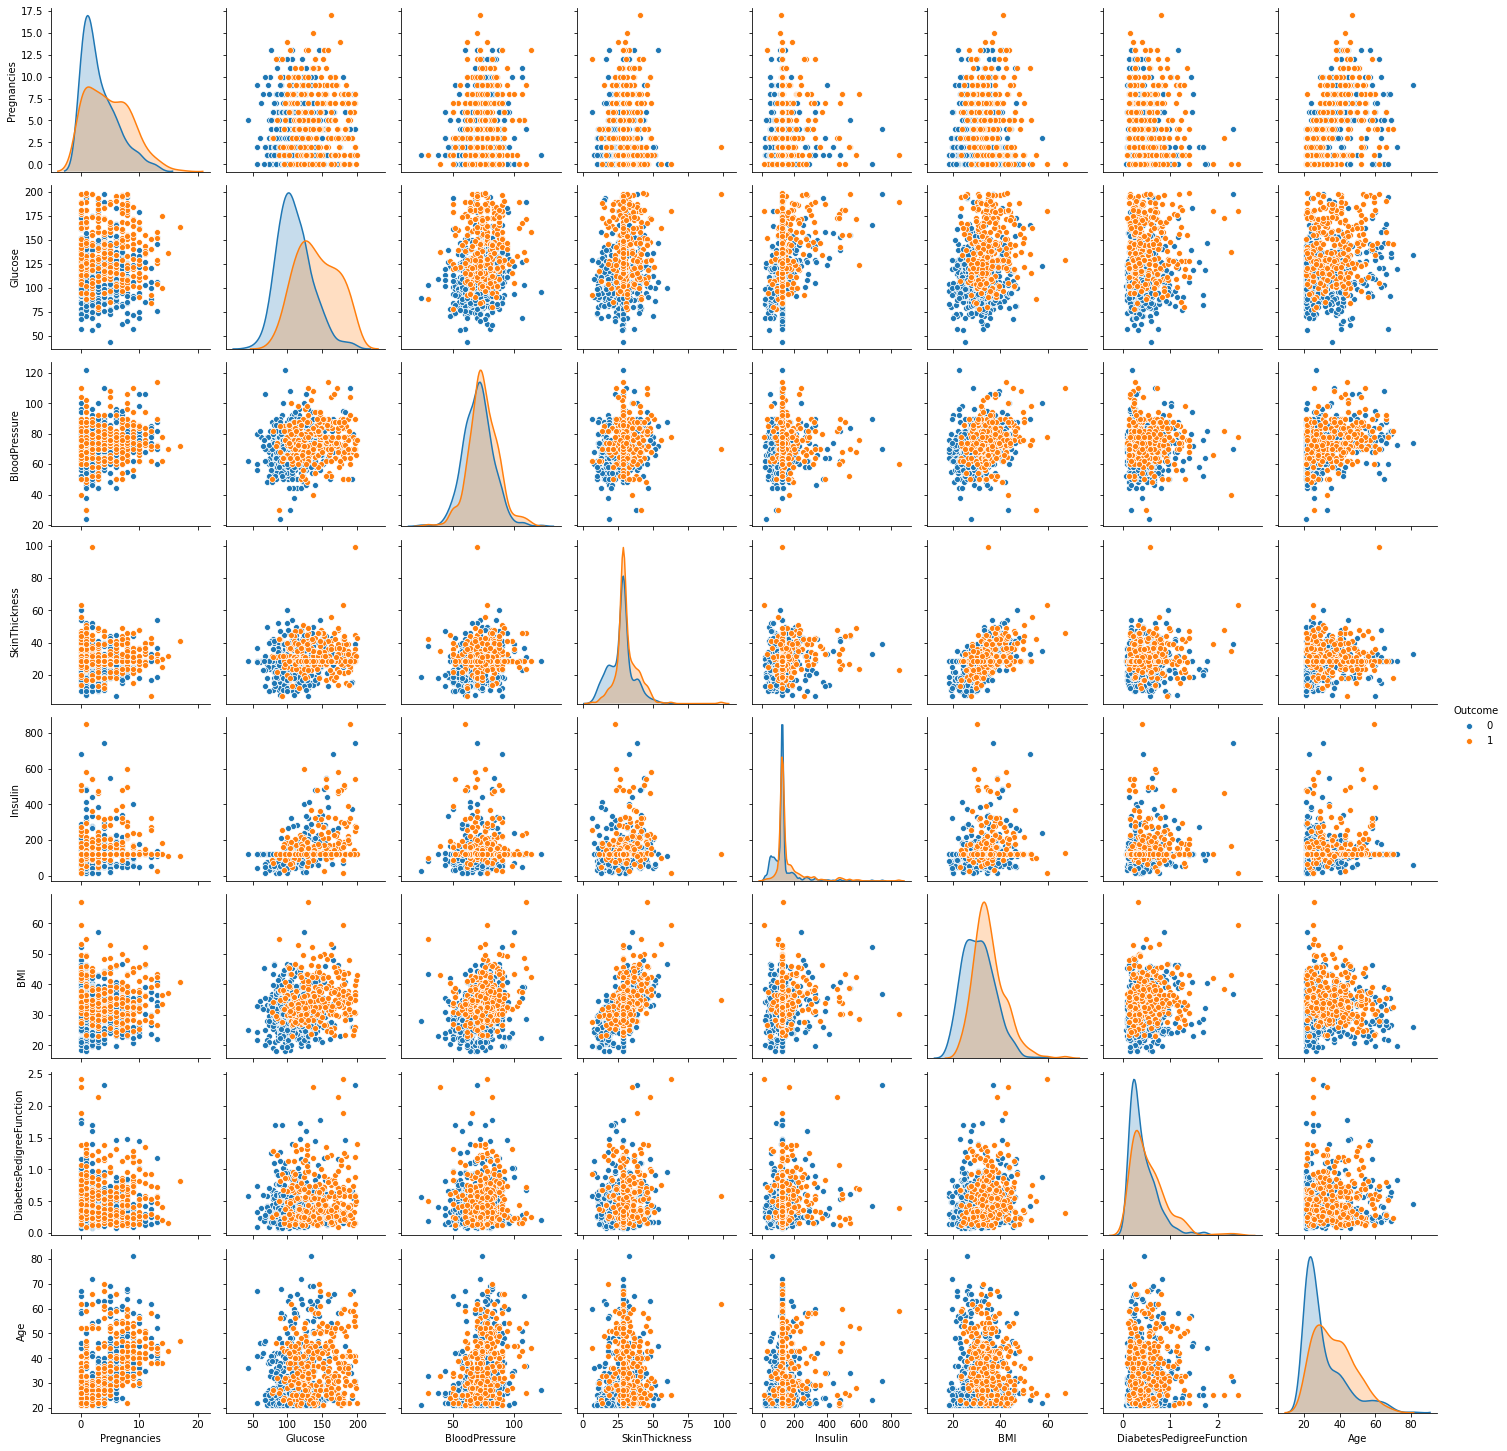

In [97]:
plt.figure(figsize=(25,25))
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

0    500
1    268
Name: Outcome, dtype: int64


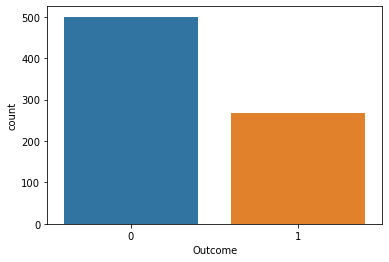

In [92]:
sns.countplot(diabetes['Outcome'])

print(diabetes.Outcome.value_counts())


Looks like the outcome feature is unbalanced because the number of values 0 and 1 does differ.

Value 0 for non-diabetic
Value 1 for diabetic

The number of non-diabetics is almost twice the number of diabetic patients

Heatmap for diabetes unclean data

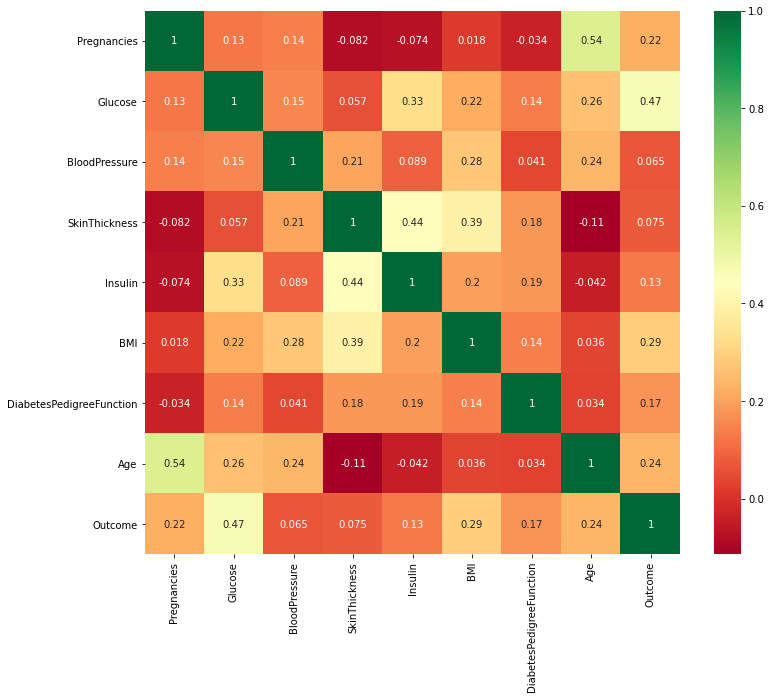

In [9]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Heatmap for diabetes clean data

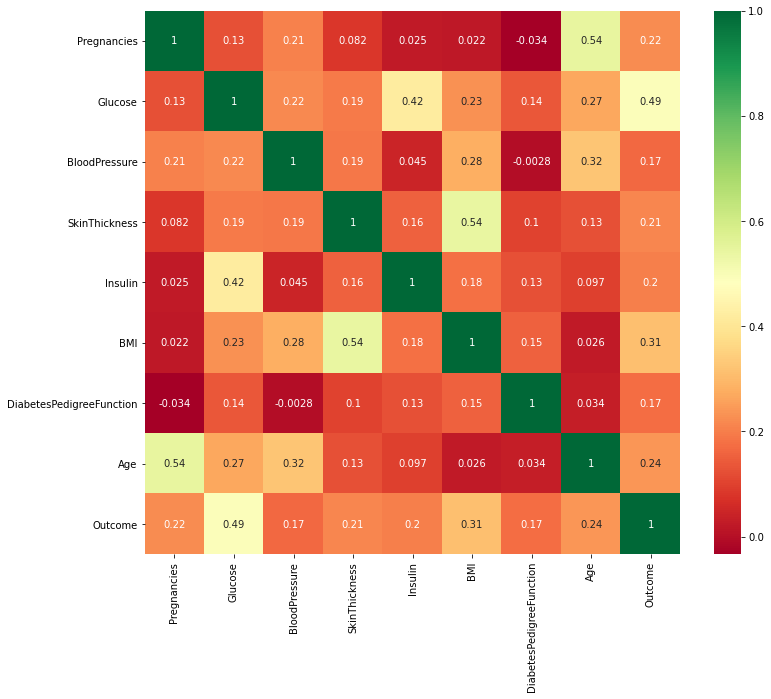

In [98]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap


In [232]:
sc = StandardScaler()
x =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])


In [233]:
y = diabetes_data_copy.Outcome

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [234]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [235]:
#sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [236]:
np.mean(x_train)

Pregnancies                -0.000992
Glucose                     0.002221
BloodPressure              -0.006848
SkinThickness              -0.043248
Insulin                    -0.007848
BMI                         0.006899
DiabetesPedigreeFunction    0.003444
Age                        -0.023507
dtype: float64

In [237]:
np.mean(x_train_std)

-2.067454422020776e-18

In [238]:
np.std(x_train)

Pregnancies                 1.015510
Glucose                     0.999424
BloodPressure               1.034345
SkinThickness               0.964782
Insulin                     0.982340
BMI                         0.999939
DiabetesPedigreeFunction    1.020814
Age                         0.987521
dtype: float64

In [239]:
np.std(x_train_std)

1.0

In [240]:
def model (x_train, y_train, x_test, y_test, metric ='minkowski', weights='uniform'):
    #list k for KNN
    k_list = list (range(1,50,1))
        
    scores = []
    
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k, metric = metric, weights = weights)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        scores.append (accuracy_score(y_pred, y_test))
        
    optimal_k = k_list[scores.index(max(scores))]
    print("Optimal number of neighbors:", optimal_k)
    print("Accuracy of optimal k:", max(scores))
            
    plt. plot(k_list, scores)
    plt.xlabel ("Number of neighnors k")
    plt.ylabel("Accuracy score")
    plt.show()

Optimal number of neighbors: 29
Accuracy of optimal k: 0.7878787878787878


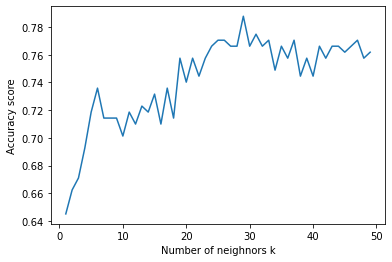

In [241]:
model(x_train_std, y_train, x_test_std, y_test)

In [252]:
knn =KNeighborsClassifier(n_neighbors = 29, metric ="minkowski", p=2, n_jobs =1)
knn.fit(x_train_std, y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=29)

In [253]:
y_pred = knn.predict(x_test_std)
print("Accuracy :", accuracy_score(y_pred, y_test))
print("Misclassified:", (y_test != y_pred).sum())

Accuracy : 0.7878787878787878
Misclassified: 49


In [254]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[136,  12],
       [ 37,  46]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

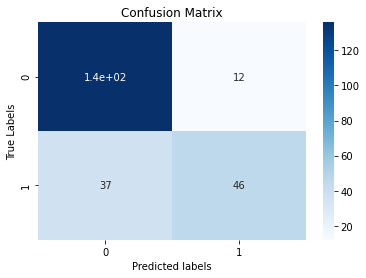

In [255]:
ax = plt.subplot()
sns.heatmap(cm, annot =True, ax=ax, cmap=plt.cm.Blues)
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")


In [256]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,136,12,148
1,36,47,83
All,172,59,231


Text(0.5, 15.0, 'Predicted label')

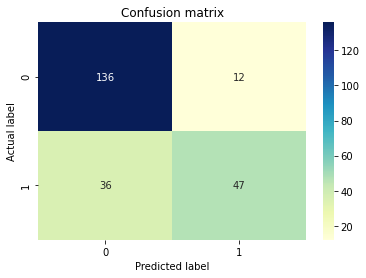

In [257]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [258]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       148
           1       0.80      0.57      0.66        83

    accuracy                           0.79       231
   macro avg       0.79      0.74      0.76       231
weighted avg       0.79      0.79      0.78       231



Successfully  Implemented a KNN classifier on the diabetes.csv. The KNN model classified the data points on their Outcome based on the rest of the values. 

# Hyper Parameter optimization

In [249]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x, y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}
